<a href="https://colab.research.google.com/github/bablu-714850/RugvedTask/blob/main/task2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving co2.csv to co2.csv


In [ ]:
df=pd.read_csv('co2.csv')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class LinearRegression:
    def __init__(self, learning_rate, iterations):


        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 10 == 0:
                print(f"Iteration {i}: weights = {self.weights}, bias = {self.bias}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mse(self, y_test, y_pred):
        return np.mean((y_test - y_pred) ** 2)
    def score(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        r2_score = 1 - (ss_residual / ss_total)
        return r2_score

X = df[['Fuel Consumption Comb (L/100 km)','Engine Size(L)','Cylinders']].values.reshape(-1, 3)
y = df["CO2 Emissions(g/km)"].values.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

model = LinearRegression(learning_rate=0.1, iterations=300)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Predictions:", y_pred)


Iteration 0: weights = [0.09225644 0.08523582 0.0840074 ], bias = -0.0004914177009385246
Iteration 10: weights = [0.38262666 0.28358218 0.27686129], bias = -0.0018046437649851979
Iteration 20: weights = [0.44844846 0.26749323 0.25947074], bias = -0.0017641982305039415
Iteration 30: weights = [0.49278469 0.24680666 0.23936829], bias = -0.001623719636353355
Iteration 40: weights = [0.52705768 0.2296397  0.22409269], bias = -0.001489472253520067
Iteration 50: weights = [0.55378793 0.2155667  0.21282804], bias = -0.0013784753250788027
Iteration 60: weights = [0.57465948 0.20396076 0.20465289], bias = -0.0012913970015924414
Iteration 70: weights = [0.59097016 0.1943185  0.19884105], bias = -0.0012248304599034902
Iteration 80: weights = [0.60372899 0.18624492 0.19483   ], bias = -0.0011747840262100212
Iteration 90: weights = [0.61372089 0.17943003 0.19218481], bias = -0.0011376930805643618
Iteration 100: weights = [0.62155654 0.17363019 0.19056963], bias = -0.0011106312838423378
Iteration 11

In [ ]:
model.mse(y_test,y_pred)

0.12654020383272024

In [ ]:
r2 = model.score(y_test, y_pred)
print(f"R² Score: {r2}")


R² Score: 0.8726749064577639


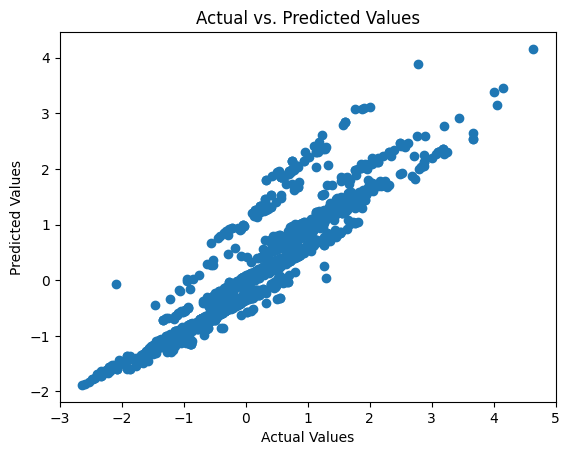

In [ ]:

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


In [ ]:

X = df[["Fuel Consumption Comb (L/100 km)","Cylinders"]].values.reshape(-1, 2)
y = df["CO2 Emissions(g/km)"].values.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

model = LinearRegression(learning_rate=1, iterations=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Predictions:", y_pred)


Iteration 0: weights = [0.92256437 0.84007399], bias = -0.004914177009385246
Iteration 10: weights = [0.7063688  0.35256776], bias = -0.0017920213008418321
Iteration 20: weights = [0.68384465 0.30784647], bias = -0.0015066172458920335
Iteration 30: weights = [0.68153977 0.30372545], bias = -0.0014804032454537824
Iteration 40: weights = [0.68130705 0.30334412], bias = -0.0014779848780422443
Iteration 50: weights = [0.68128379 0.3033087 ], bias = -0.0014777608663128692
Iteration 60: weights = [0.68128149 0.3033054 ], bias = -0.0014777400395329235
Iteration 70: weights = [0.68128126 0.30330509], bias = -0.0014777380967557691
Iteration 80: weights = [0.68128124 0.30330506], bias = -0.0014777379149842598
Iteration 90: weights = [0.68128124 0.30330506], bias = -0.001477737897931673
Predictions: [-0.0966217  -0.85242059  0.0682627  ... -1.11152464  2.3786859
 -1.08796972]


In [ ]:
model.mse(y_test,y_pred)

0.1287546518259002

In [ ]:
r2 = model.score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.8704467229292405


In [ ]:
df


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
